In [634]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [635]:
# Categorize transactions into Income and Expenses
def categorize_transaction(narration):
    if 'credit' in narration.lower():
        return 'Income'
    else:
        return 'Expense'

# Brisbane

In [636]:
brisbane_df = pd.read_csv(
    'data/bank_statements/Brisbane.csv',
    names=['Date', 'Transaction Value', 'Narration', 'Account Balance']
)
brisbane_df.head()

,Date,Transaction Value,Narration,Account Balance
0,30/06/2023,46.00,POS 26652200 30 JUN,28039.26
1,30/06/2023,903.29,Direct Credit 485450 SQUARE AU PTY LT,27993.26
2,29/06/2023,26.00,POS 26652200 29 JUN,27089.97
3,29/06/2023,948.77,Direct Credit 485450 SQUARE AU PTY LT,27063.97
4,28/06/2023,169.00,POS 26652200 28 JUN,26115.20


In [637]:
brisbane_df['Date'] = pd.to_datetime(brisbane_df['Date'], dayfirst=True, errors='coerce')
brisbane_df.dtypes

Date                 datetime64[ns]
Transaction Value           float64
Narration                    object
Account Balance             float64
dtype: object

In [638]:
# Display basic information about the dataset
brisbane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Transaction Value  600 non-null    float64       
 2   Narration          600 non-null    object        
 3   Account Balance    600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 18.9+ KB


In [639]:
# Summary statistics
brisbane_df.describe()

,Date,Transaction Value,Account Balance
count,600,600.000000,600.000000
mean,2023-03-26 06:48:00,25.976183,20181.530483
min,2022-12-18 00:00:00,-10200.000000,1755.930000
25%,2023-02-06 00:00:00,-58.440000,14267.565000
50%,2023-03-27 00:00:00,93.000000,19151.435000
75%,2023-05-13 06:00:00,509.870000,23569.042500
max,2023-06-30 00:00:00,7000.000000,44448.620000
std,NaN,1463.827134,9457.760861


In [640]:
# Check for missing values
brisbane_df.isnull().sum()

Date                 0
Transaction Value    0
Narration            0
Account Balance      0
dtype: int64

In [641]:
brisbane_df['Category'] = brisbane_df['Narration'].apply(categorize_transaction)

# Display the first few rows to confirm the changes
brisbane_df.head()  # fix_me 

,Date,Transaction Value,Narration,Account Balance,Category
0,2023-06-30,46.00,POS 26652200 30 JUN,28039.26,Expense
1,2023-06-30,903.29,Direct Credit 485450 SQUARE AU PTY LT,27993.26,Income
2,2023-06-29,26.00,POS 26652200 29 JUN,27089.97,Expense
3,2023-06-29,948.77,Direct Credit 485450 SQUARE AU PTY LT,27063.97,Income
4,2023-06-28,169.00,POS 26652200 28 JUN,26115.20,Expense


In [642]:
# Sort by date to ensure correct sequential processing
brisbane_df = brisbane_df.sort_values(by='Date').reset_index(drop=True)

In [643]:
# Calculate the change in account balance for each transaction
brisbane_df['Balance Change'] = brisbane_df['Account Balance'].diff()

In [644]:
# Classify transactions based on the change in account balance
brisbane_df['Category'] = brisbane_df['Balance Change'].apply(lambda x: 'Credit' if x > 0 else 'Debit')

# Display the first few rows to confirm the changes
brisbane_df.head()

,Date,Transaction Value,Narration,Account Balance,Category,Balance Change
0,2022-12-18,-33.10,BUNNINGS 556000 NEWSTEAD AU Card xx8568,12420.45,Debit,NaN
1,2022-12-18,-16.47,BUNNINGS 556000 NEWSTEAD AU Card xx8568,12403.98,Debit,-16.47
2,2022-12-18,22.00,POS 26652200 18 DEC,12425.98,Credit,22.00
3,2022-12-19,69.98,Direct Credit 485450 SQUARE AU PTY LT,12495.96,Credit,69.98
4,2022-12-19,98.00,POS 26652200 19 DEC,12593.96,Credit,98.00


In [645]:
# Monthly summary of transactions
monthly_summary = brisbane_df.groupby([brisbane_df['Date'].dt.to_period('M'), 'Category'])['Transaction Value'].sum().unstack().fillna(0)

In [646]:
# Calculate net balance for each month
monthly_summary['Net Cash'] = monthly_summary['Credit'] + monthly_summary['Debit']

In [647]:
# Calculate total income, total expenses, and net balance
total_income = brisbane_df[brisbane_df['Category'] == 'Credit']['Transaction Value'].sum()
total_expenses = brisbane_df[brisbane_df['Category'] == 'Debit']['Transaction Value'].sum()
net_balance = total_income + total_expenses

In [648]:
# Print key metrics
print(f"Total Income: {total_income}")
print(f"Total Expenses: {total_expenses}")
print(f"Net Balance: {round(net_balance, 2)}")

Total Income: 162875.28
Total Expenses: -147289.57
Net Balance: 15585.71


In [649]:
# Display monthly summary
monthly_summary

Category,Credit,Debit,Net Cash
Date,,,
2022-12,7518.97,-9242.65,-1723.68
2023-01,27558.03,-23332.82,4225.21
2023-02,23328.31,-25572.61,-2244.30
2023-03,19567.91,-12279.34,7288.57
2023-04,24688.94,-19599.13,5089.81
2023-05,32476.78,-40253.49,-7776.71
2023-06,27736.34,-17009.53,10726.81


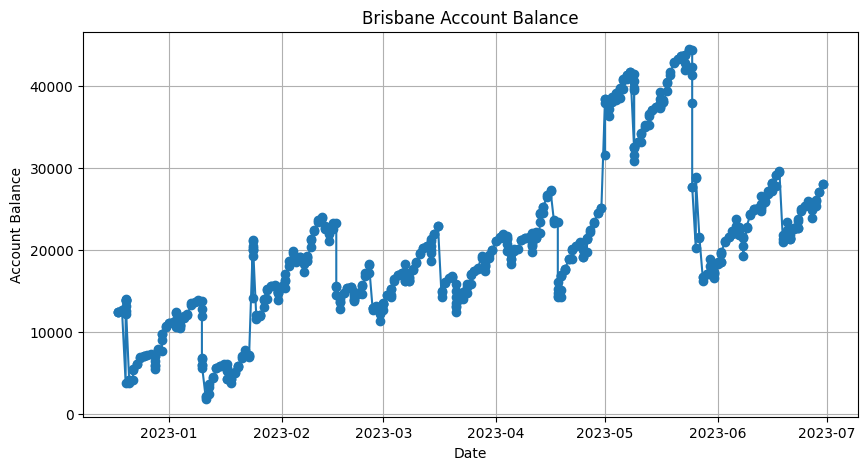

In [650]:
plt.figure(figsize=(10, 5))
plt.plot(brisbane_df['Date'], brisbane_df['Account Balance'], marker='o', linestyle='-')
plt.title('Brisbane Account Balance')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()

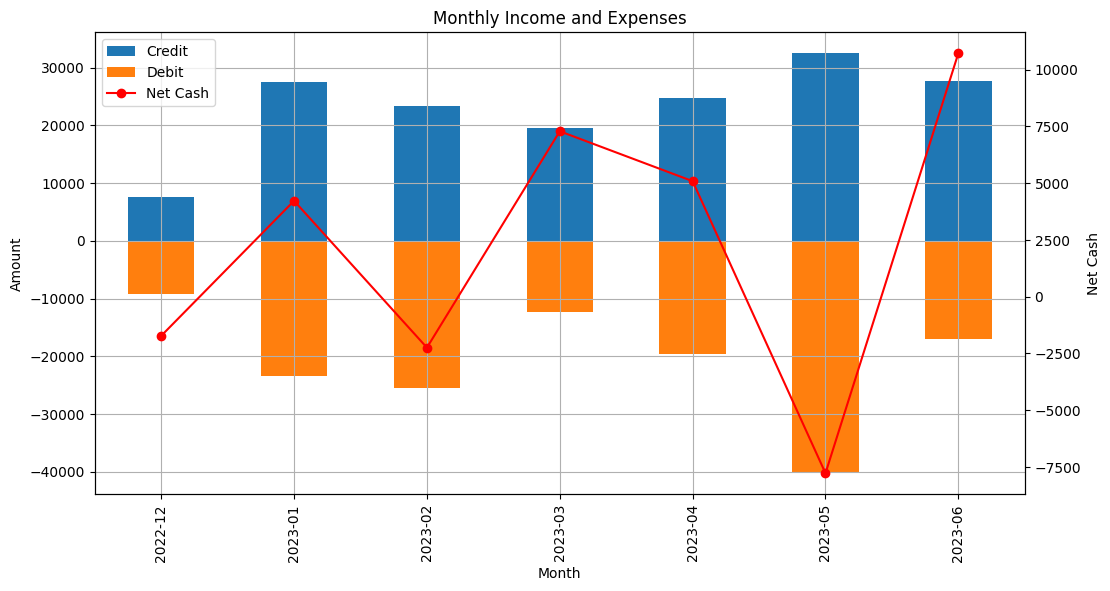

In [651]:
# plotting monthly income and expenses with net cash line
fig, ax1 = plt.subplots(figsize=(12, 6))

monthly_summary[['Credit', 'Debit']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Monthly Income and Expenses')
ax1.set_xlabel('Month')
ax1.set_ylabel('Amount')
ax1.grid(True)

# Plot net cash line
ax2 = ax1.twinx()
ax2.plot(monthly_summary.index.astype(str), monthly_summary['Net Cash'], color='red', marker='o', linestyle='-', label='Net Cash')
ax2.set_ylabel('Net Cash')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

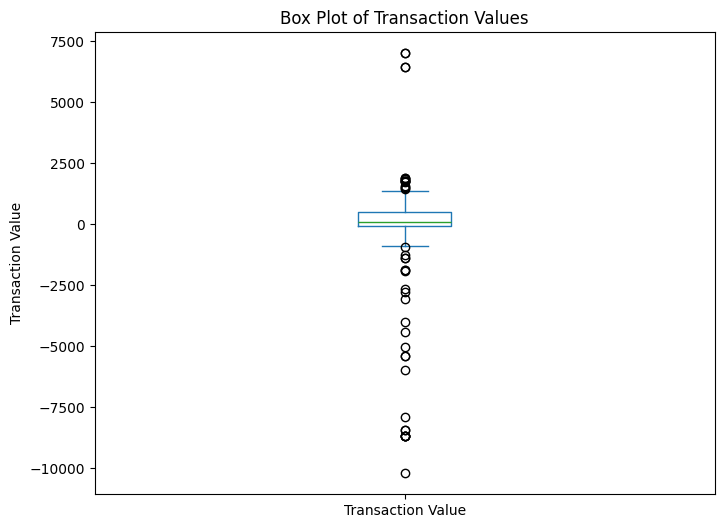

In [652]:
# Detect anomalies in transaction values
brisbane_df['Transaction Value'].plot(kind='box', figsize=(8, 6))
plt.title('Box Plot of Transaction Values')
plt.ylabel('Transaction Value')
plt.show()

In [653]:
# Interactive box plot using plotly
fig = px.box(brisbane_df, y='Transaction Value', points="all", hover_data=['Date', 'Narration', 'Transaction Value'])
fig.update_layout(
    title='Box Plot of Transaction Values with Hover Text',
    yaxis_title='Transaction Value'
)
fig.show()

In [654]:
# Identify "Square" transactions and create a new column
brisbane_df['Narration Group'] = brisbane_df['Narration'].apply(lambda x: 'Square' if 'square' in x.lower() else x)

In [655]:
# Categorize transactions into Credit and Debit based on account balance changes
brisbane_df = brisbane_df.sort_values(by='Date').reset_index(drop=True)
brisbane_df['Balance Change'] = brisbane_df['Account Balance'].diff()
brisbane_df['Category'] = brisbane_df['Balance Change'].apply(lambda x: 'Credit' if x > 0 else 'Debit')

In [656]:
# filter out negative values and select only expenses
expense_df = brisbane_df[brisbane_df['Category'] == 'Debit']
positive_expense_df = expense_df[expense_df['Transaction Value'] > 0]

In [657]:
# group by 'Narration Group' and sum the 'Transaction Value'
positive_expense_breakdown = positive_expense_df.groupby('Narration Group')['Transaction Value'].sum()

In [658]:
# Get the top 10 expense categories and group the rest into 'Other'
top_expense_breakdown = positive_expense_breakdown.nlargest(10)
other_expenses = positive_expense_breakdown.sum() - top_expense_breakdown.sum()
top_expense_breakdown['Other'] = other_expenses

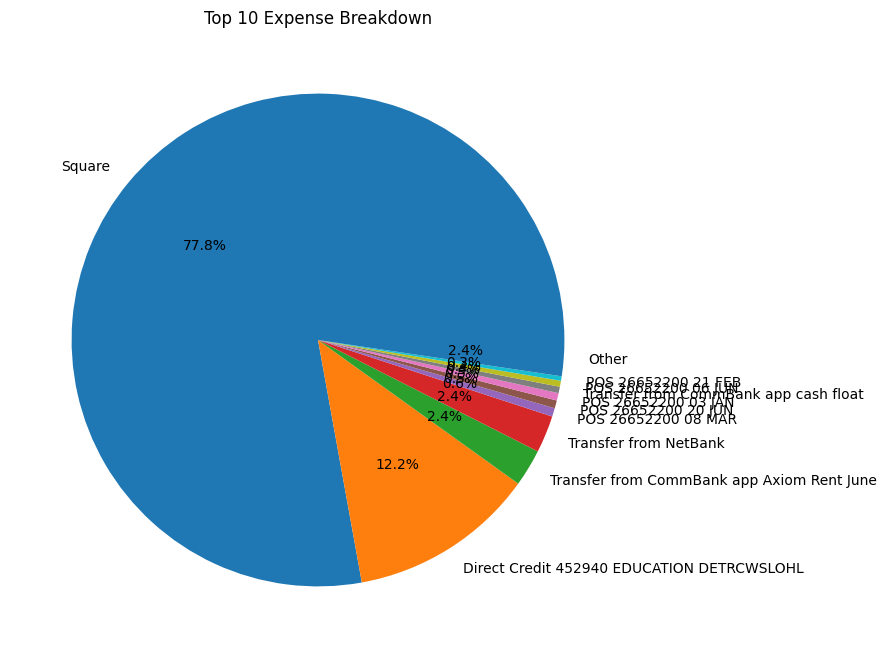

In [659]:
# Plot expense breakdown
top_expense_breakdown.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 10 Expense Breakdown')
plt.ylabel('')
plt.show()

# Southside

In [660]:
southside_df = pd.read_csv(
    'data/bank_statements/Southside.csv',
    names=['Date', 'Transaction Value', 'Narration', 'Account Balance']
)
southside_df.head()

,Date,Transaction Value,Narration,Account Balance
0,30/06/2023,12.00,POS 36925500 30 JUN,17412.96
1,30/06/2023,80.00,Fast Transfer From Mr Jianxuan Dong Raymond,17400.96
2,30/06/2023,1187.95,Direct Credit 485450 SQUARE AU PTY LT,17320.96
3,30/06/2023,121.81,Direct Credit 070354 ZEROW SB MERCHANT SETTLEMNT,16133.01
4,29/06/2023,154.00,POS 36925500 29 JUN,16011.20


In [661]:
southside_df['Date'] = pd.to_datetime(
    southside_df['Date'], 
    dayfirst=True, 
    errors='coerce'
)
southside_df.dtypes

Date                 datetime64[ns]
Transaction Value           float64
Narration                    object
Account Balance             float64
dtype: object

In [662]:
southside_df.describe()

,Date,Transaction Value,Account Balance
count,600,600.000000,600.000000
mean,2023-04-22 06:00:00,-46.835550,32184.871150
min,2023-02-13 00:00:00,-14000.000000,14047.660000
25%,2023-03-20 00:00:00,8.750000,26450.277500
50%,2023-04-23 12:00:00,83.500000,32447.580000
75%,2023-05-26 00:00:00,237.690000,37044.662500
max,2023-06-30 00:00:00,12800.000000,46927.410000
std,NaN,1580.204383,6821.487353


In [663]:
southside_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Transaction Value  600 non-null    float64       
 2   Narration          600 non-null    object        
 3   Account Balance    600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 18.9+ KB


In [664]:
southside_df.isnull().sum()

Date                 0
Transaction Value    0
Narration            0
Account Balance      0
dtype: int64

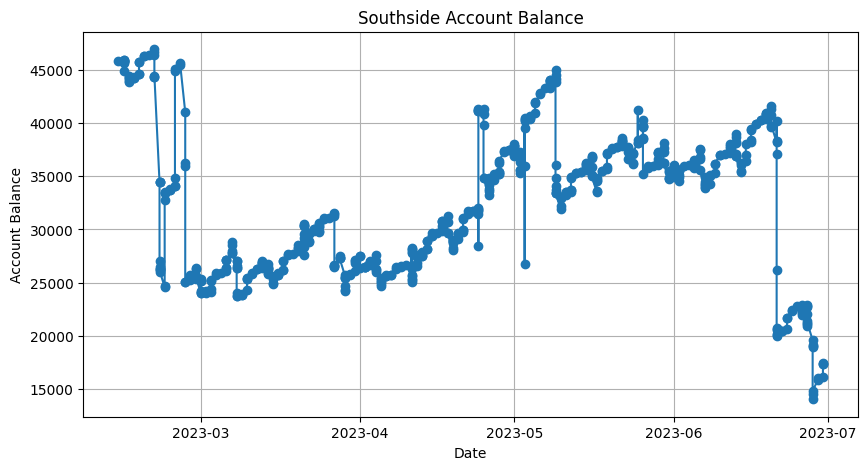

In [665]:
plt.figure(figsize=(10, 5))
plt.plot(southside_df['Date'], southside_df['Account Balance'], marker='o', linestyle='-')
plt.title('Southside Account Balance')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()

# Cairns

In [666]:
cairns_df = pd.read_csv(
    'data/bank_statements/Cairns.csv',
    names=['Date', 'Transaction Value', 'Narration', 'Account Balance']
)
cairns_df.head()

,Date,Transaction Value,Narration,Account Balance
0,30/06/2023,199.00,POS 35362000 30 JUN,28457.73
1,30/06/2023,-441.50,NU NU RESTAURANT PALM COVE AU Card xx3475,28258.73
2,30/06/2023,625.12,Direct Credit 485450 SQUARE AU PTY LT,28700.23
3,30/06/2023,250.00,Direct Credit 148013 W M JACOB Will Jacob rent,28075.11
4,30/06/2023,235.00,Fast Transfer From BCH Strength CREDIT TO ACCO...,27825.11


In [667]:
cairns_df['Date'] = pd.to_datetime(
    cairns_df['Date'], 
    dayfirst=True, 
    errors='coerce'
)
cairns_df.dtypes

Date                 datetime64[ns]
Transaction Value           float64
Narration                    object
Account Balance             float64
dtype: object

In [668]:
cairns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Transaction Value  600 non-null    float64       
 2   Narration          600 non-null    object        
 3   Account Balance    600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 18.9+ KB


In [669]:
cairns_df.describe()

,Date,Transaction Value,Account Balance
count,600,600.000000,600.000000
mean,2023-04-10 12:28:48,43.811083,9948.890167
min,2023-01-18 00:00:00,-5038.510000,315.940000
25%,2023-02-25 18:00:00,-108.917500,3752.185000
50%,2023-04-11 00:00:00,45.000000,7390.345000
75%,2023-05-25 00:00:00,201.250000,15511.540000
max,2023-06-30 00:00:00,5888.000000,28700.230000
std,NaN,1070.258521,7332.540564


In [670]:
cairns_df.isnull().sum()

Date                 0
Transaction Value    0
Narration            0
Account Balance      0
dtype: int64

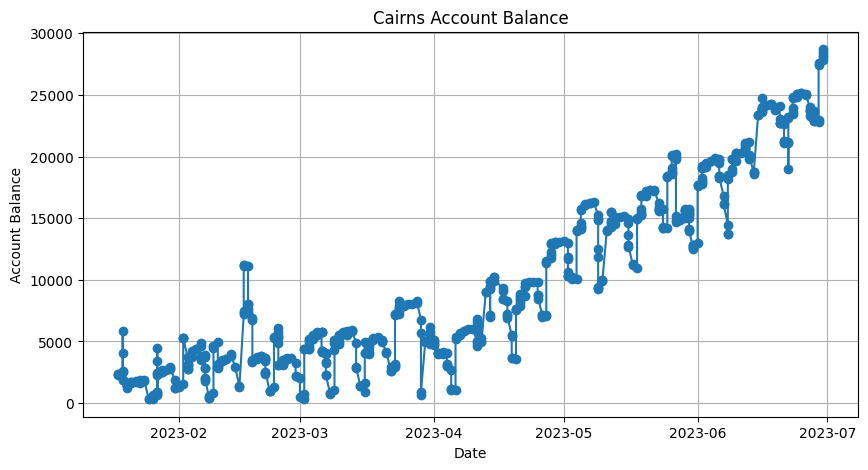

In [671]:
plt.figure(figsize=(10, 5))
plt.plot(cairns_df['Date'], cairns_df['Account Balance'], marker='o', linestyle='-')
plt.title('Cairns Account Balance')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()

# Mackay

In [672]:
mackay_df = pd.read_csv(
    'data/bank_statements/Mackay.csv',
    names=['Date', 'Transaction Value', 'Narration', 'Account Balance']
)
mackay_df.head()

,Date,Transaction Value,Narration,Account Balance
0,30/06/2023,195.00,POS 17509700 30 JUN,26936.25
1,30/06/2023,-488.00,Transfer To Wiktoria Alexandersson CommBank Ap...,26741.25
2,30/06/2023,-1113.46,Transfer To Rebecca Moore CommBank App ZeroW Pay,27229.25
3,30/06/2023,-620.40,Transfer To Illguth Family CommBank App ZeroW Pay,28342.71
4,30/06/2023,-135.53,Transfer To Crafty Properties NetBank ZeroW Ma...,28963.11


In [673]:
mackay_df['Date'] = pd.to_datetime(
    mackay_df['Date'], 
    dayfirst=True, 
    errors='coerce'
)
mackay_df.dtypes

Date                 datetime64[ns]
Transaction Value           float64
Narration                    object
Account Balance             float64
dtype: object

In [674]:
mackay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Transaction Value  600 non-null    float64       
 2   Narration          600 non-null    object        
 3   Account Balance    600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 18.9+ KB


In [675]:
mackay_df.describe()

,Date,Transaction Value,Account Balance
count,600,600.000000,600.000000
mean,2023-04-19 08:55:12,-24.290850,35584.320050
min,2023-02-09 00:00:00,-15300.000000,8225.730000
25%,2023-03-14 00:00:00,-203.500000,24282.020000
50%,2023-04-18 00:00:00,-12.805000,34414.545000
75%,2023-05-29 06:00:00,120.000000,46282.795000
max,2023-06-30 00:00:00,11106.720000,62532.770000
std,NaN,2267.652377,12648.336441


In [676]:
mackay_df.isnull().sum()

Date                 0
Transaction Value    0
Narration            0
Account Balance      0
dtype: int64

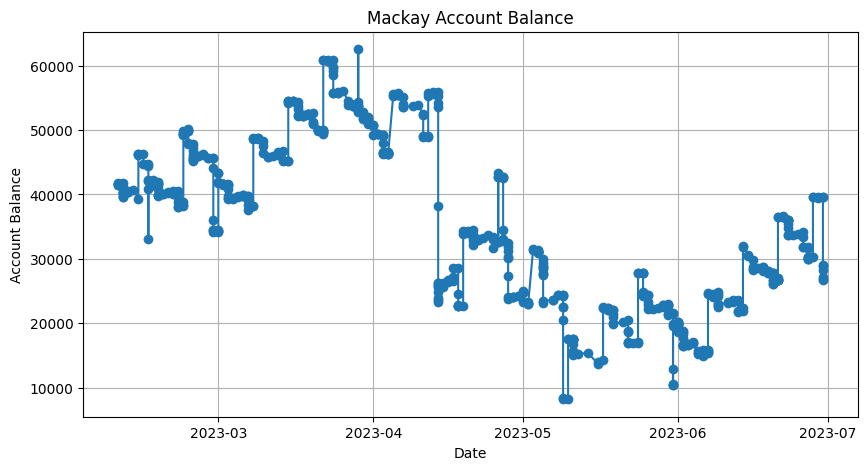

In [677]:
plt.figure(figsize=(10, 5))
plt.plot(mackay_df['Date'], mackay_df['Account Balance'], marker='o', linestyle='-')
plt.title('Mackay Account Balance')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()

# Gold Coast

In [678]:
gc_df = pd.read_csv(
    'data/bank_statements/LilleyBuddy.csv',
    names=['Date', 'Transaction Value', 'Narration', 'Account Balance']
)
gc_df.head()

,Date,Transaction Value,Narration,Account Balance
0,30/06/2023,25.00,POS 83081600 30 JUN,5696.73
1,30/06/2023,233.00,POS 83081300 30 JUN,5671.73
2,30/06/2023,1674.91,Direct Credit 485450 SQUARE AU PTY LT,5438.73
3,30/06/2023,-1005.05,Transfer To Frucor CommBank App 671450zerow,3763.82
4,30/06/2023,-500.00,DEFT RENT NetBank BPAY 4481 34268144,4768.87


In [679]:
gc_df['Date'] = pd.to_datetime(
    mackay_df['Date'], 
    dayfirst=True, 
    errors='coerce'
)
gc_df.dtypes

Date                 datetime64[ns]
Transaction Value           float64
Narration                    object
Account Balance             float64
dtype: object

In [680]:
gc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Transaction Value  600 non-null    float64       
 2   Narration          600 non-null    object        
 3   Account Balance    600 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 18.9+ KB


In [681]:
gc_df.describe()

,Date,Transaction Value,Account Balance
count,600,600.00000,600.000000
mean,2023-04-19 08:55:12,-5.17910,13263.000850
min,2023-02-09 00:00:00,-17780.73000,179.530000
25%,2023-03-14 00:00:00,-500.00000,8394.232500
50%,2023-04-18 00:00:00,62.10000,12036.030000
75%,2023-05-29 06:00:00,501.38250,17511.512500
max,2023-06-30 00:00:00,17780.73000,36604.750000
std,NaN,2200.40878,6465.255574


In [682]:
gc_df.isnull().sum()

Date                 0
Transaction Value    0
Narration            0
Account Balance      0
dtype: int64

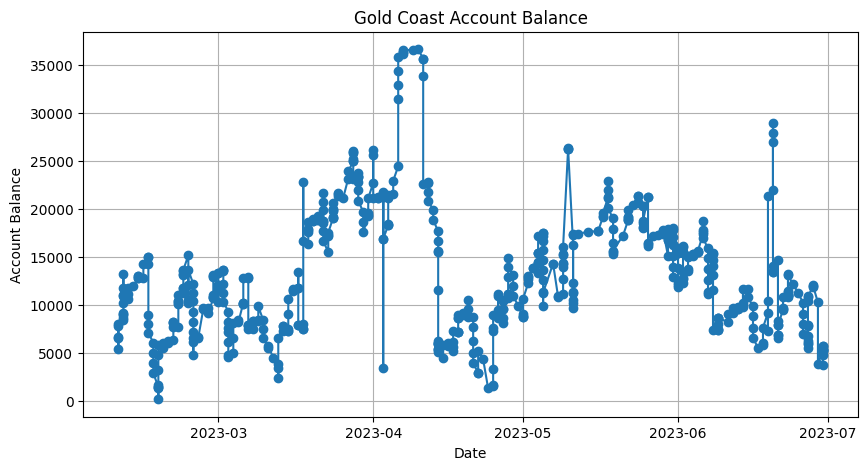

In [683]:
plt.figure(figsize=(10, 5))
plt.plot(gc_df['Date'], gc_df['Account Balance'], marker='o', linestyle='-')
plt.title('Gold Coast Account Balance')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()